In [0]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist=input_data.read_data_sets('MNIST_data',validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


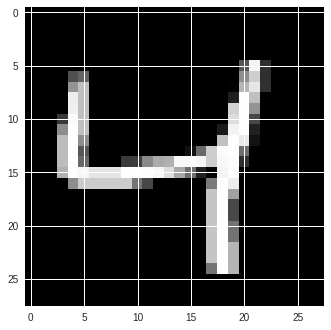

In [0]:
img=mnist.train.images[2]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')

In [0]:
learning_rate = 0.001
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_,64,(3,3),padding='same',activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1,(2,2),(2,2),padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1,64,(3,3),padding='same',activation=tf.nn.relu)

# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2,(2,2),(2,2),padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2,32,(3,3),padding='same',activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3,(2,2),(2,2),padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded,(7,7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1,32,(3,3),padding='same',activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4,(14,14))
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2,64,(3,3),padding='same',activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5,(28,28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3,64,(3,3),padding='same',activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6,1,(3,3),padding='same',activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded =tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
sess=tf.Session()

In [0]:
epochs=100
batch_size=200
noise_factore=0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
  for ii in range(mnist.train.num_examples//batch_size):
    batch=mnist.train.next_batch(batch_size)
    imgs=batch[0].reshape((-1,28,28,1))
    noisy_imgs=imgs+noise_factore*np.random.randn(*imgs.shape)
    noisy_imgs=np.clip(noisy_imgs,0.,1.)
    batch_cost,_=sess.run([cost,opt],feed_dict={inputs_:noisy_imgs,targets_:imgs})
    print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/100... Training loss: 0.6887
Epoch: 1/100... Training loss: 0.6431
Epoch: 1/100... Training loss: 0.5667
Epoch: 1/100... Training loss: 0.4964
Epoch: 1/100... Training loss: 0.5814
Epoch: 1/100... Training loss: 0.5251
Epoch: 1/100... Training loss: 0.4739
Epoch: 1/100... Training loss: 0.4710
Epoch: 1/100... Training loss: 0.4684
Epoch: 1/100... Training loss: 0.4469
Epoch: 1/100... Training loss: 0.4414
Epoch: 1/100... Training loss: 0.4220
Epoch: 1/100... Training loss: 0.3885
Epoch: 1/100... Training loss: 0.3811
Epoch: 1/100... Training loss: 0.3575
Epoch: 1/100... Training loss: 0.3353
Epoch: 1/100... Training loss: 0.3218
Epoch: 1/100... Training loss: 0.3100
Epoch: 1/100... Training loss: 0.2920
Epoch: 1/100... Training loss: 0.2893
Epoch: 1/100... Training loss: 0.2794
Epoch: 1/100... Training loss: 0.2847
Epoch: 1/100... Training loss: 0.2776
Epoch: 1/100... Training loss: 0.2780
Epoch: 1/100... Training loss: 0.2715
Epoch: 1/100... Training loss: 0.2730
Epoch: 1/100

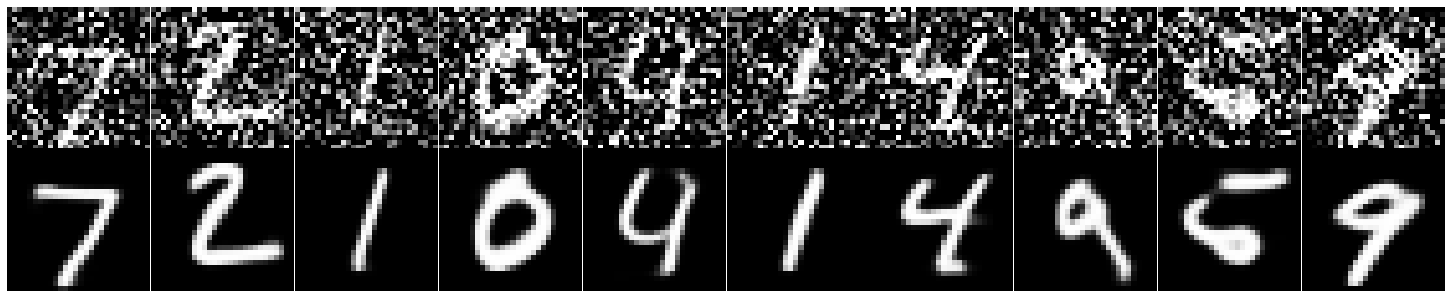

In [0]:
noise_factor=0.5

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)